<a href="https://colab.research.google.com/github/SamuelRaj0911/ML-Lab/blob/main/Lab_7_2348550.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [16]:
df = pd.read_csv('/content/employee_data (1) 2.csv')

In [17]:
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


In [18]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [19]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

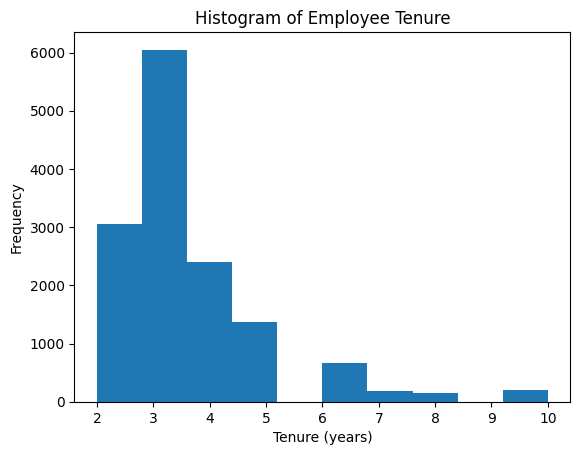

In [20]:
tenure = df["tenure"]
plt.hist(tenure, bins=10) # You can change the number of bins as you like
plt.xlabel("Tenure (years)") # Add x-axis label
plt.ylabel("Frequency") # Add y-axis label
plt.title("Histogram of Employee Tenure") # Add title
plt.show() # Show the plot

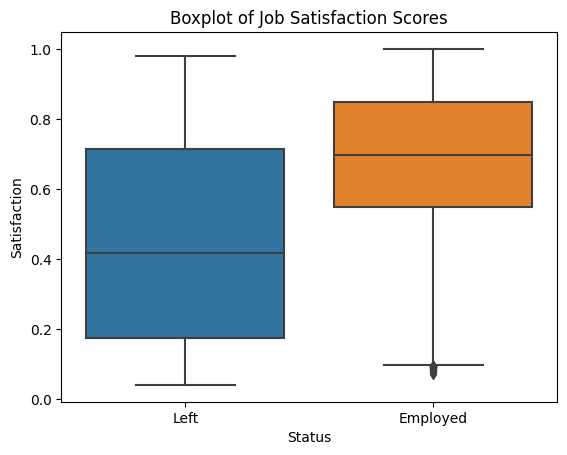

In [21]:
satisfaction = df["satisfaction"]
status = df["status"]
sns.boxplot(x="status", y="satisfaction", data=df)
plt.xlabel("Status") # Add x-axis label
plt.ylabel("Satisfaction") # Add y-axis label
plt.title("Boxplot of Job Satisfaction Scores") # Add title
plt.show() # Show the plot

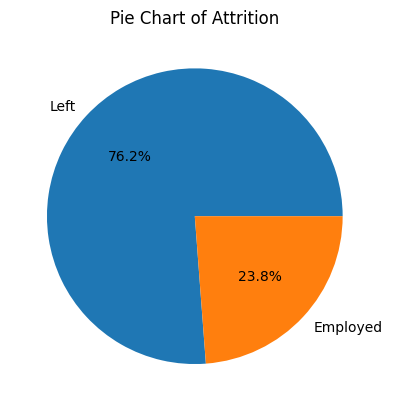

In [22]:
status = df["status"]

# Plot the pie chart
plt.pie(status.value_counts(), labels=status.unique(), autopct='%1.1f%%')
plt.title("Pie Chart of Attrition")
plt.show()

Create a scatter plot to explore the relationship between employee satisfaction scores and their last evaluation scores?

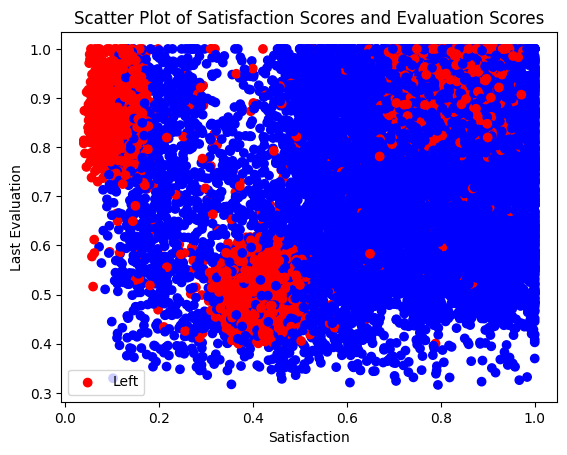

In [23]:
plt.scatter(df["satisfaction"], df["last_evaluation"], c=df["status"].map({"Left": "red", "Employed": "blue"}))
plt.xlabel("Satisfaction") # Add x-axis label
plt.ylabel("Last Evaluation") # Add y-axis label
plt.title("Scatter Plot of Satisfaction Scores and Evaluation Scores") # Add title
plt.legend(["Left", "Employed"]) # Add legend
plt.show() # Show the plot

There is no clear correlation between these two variables for employees who stayed, as they are scattered across the plot. This means that there is no linear relationship between their satisfaction scores and their evaluation scores, and that these variables do not affect each other much.

Data Preprocessing

In [24]:
for col in ['tenure', 'satisfaction']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [25]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction             0
status                   0
tenure                   0
dtype: int64

In [26]:
df["status"] = df["status"].map({"Left": 0, "Employed": 1})

In [27]:
df["status"].dtype

dtype('int64')

Building a decision tree model

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select the features and the target variable
X = df[["tenure", "satisfaction", "n_projects"]] # Features
y = df["status"] # Target

In [29]:
# Split the dataset into a training set and a testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Build a decision tree classifier to predict employee attrition
# Use entropy as the split criterion and set the maximum depth to 3 for tree pruning
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train) # Train the classifier on the training set

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [31]:
# Predict the labels of the testing set
y_pred = clf.predict(X_test)

# Evaluate the model performance using accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy of the decision tree classifier is {acc:.2f}")

The accuracy of the decision tree classifier is 0.91


Gini impurity as criteria for finding the best splits in the decision tree. Experiment with different criteria to determine which one results in a more effective model.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train, y_train) # Train the classifier on the training set

DecisionTreeClassifier()

In [34]:
y_pred_gini = clf_gini.predict(X_test)

# Evaluate the model performance using accuracy score
acc_gini = accuracy_score(y_test, y_pred_gini)
print(f"The accuracy of the decision tree classifier with Gini impurity is {acc_gini:.2f}")

The accuracy of the decision tree classifier with Gini impurity is 0.93


In [35]:
# Build a decision tree classifier with entropy as the split criterion
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train, y_train) # Train the classifier on the training set

# Predict the labels of the testing set using entropy
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the model performance using accuracy score
acc_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"The accuracy of the decision tree classifier with entropy is {acc_entropy:.2f}")

The accuracy of the decision tree classifier with entropy is 0.93


Visualize the decision tree structure

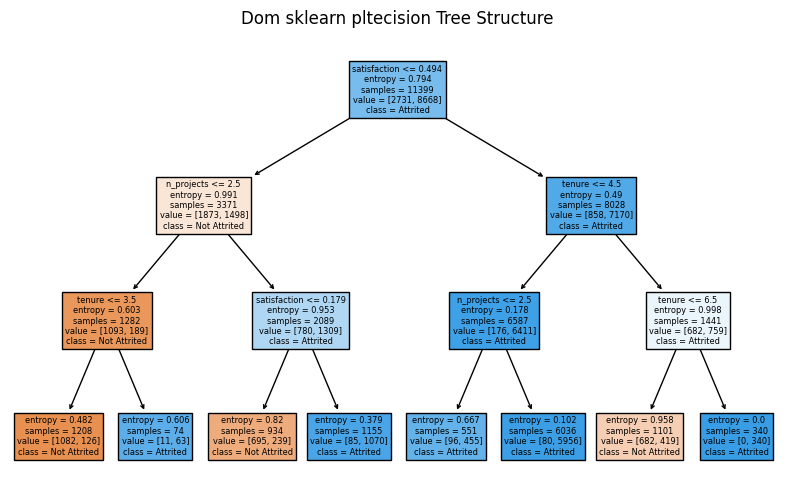

In [36]:
import tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=["Not Attrited", "Attrited"], filled=True)
plt.title("Dom sklearn pltecision Tree Structure")
plt.show()

In [37]:
depth = clf.get_depth()
print(f"The depth of the decision tree is: {depth}")

The depth of the decision tree is: 3


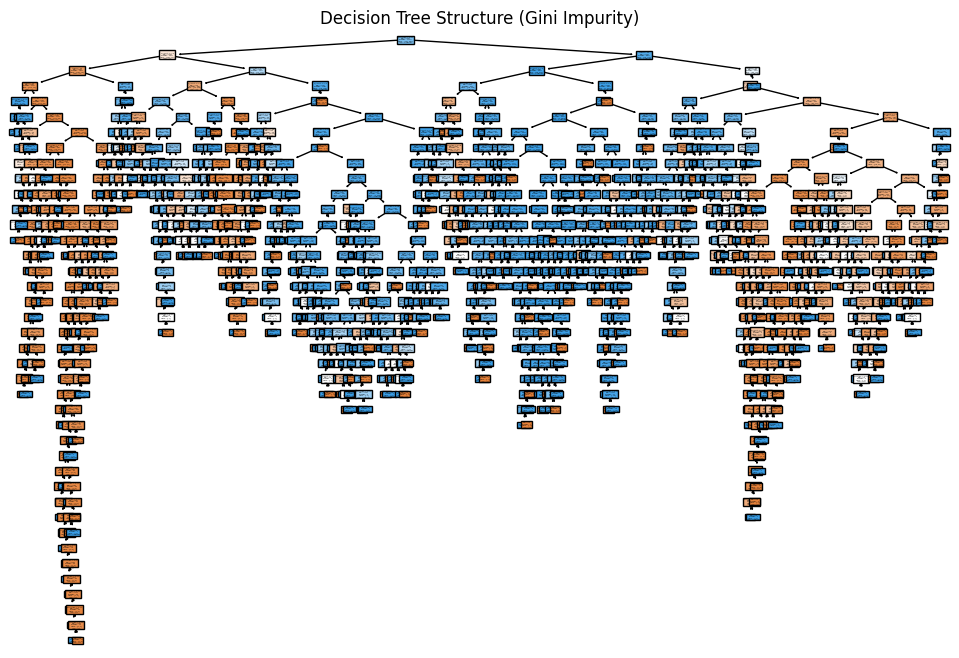

In [38]:
plt.figure(figsize=(12, 8))
plot_tree(clf_gini, filled=True, feature_names=["tenure", "satisfaction", "n_projects"], class_names=["Left", "Employed"])
plt.title('Decision Tree Structure (Gini Impurity)')
plt.show()

The depth of the tree


In [39]:
depth = clf.get_depth()
print(f"The depth of the decision tree is: {depth}")

The depth of the decision tree is: 3


influential features for predicting attrition

In [40]:
feature_importances = clf.feature_importances_
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))
print("Feature importances:")
for feature, importance in sorted_importance_dict.items():
    print(f"{feature}: {importance:.3f}")

Feature importances:
satisfaction: 0.494
tenure: 0.358
n_projects: 0.148


minimum leaf size pruning strategy

In [41]:
min_leaf_sizes = [1, 5, 10, 20]  # Different minimum leaf sizes to experiment with

for min_leaf in min_leaf_sizes:
    print(f"\nDecision Tree with Minimum Leaf Size = {min_leaf}")
    clf_min_leaf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=min_leaf)
    clf_min_leaf.fit(X_train, y_train)


Decision Tree with Minimum Leaf Size = 1

Decision Tree with Minimum Leaf Size = 5

Decision Tree with Minimum Leaf Size = 10

Decision Tree with Minimum Leaf Size = 20


In [47]:
   # Predict the labels of the testing set
y_pred_min_leaf = clf_min_leaf.predict(X_test)
# Evaluate the model performance using accuracy score
acc_min_leaf = accuracy_score(y_test, y_pred_min_leaf)
print(f"The accuracy of the decision tree with min_samples_leaf={min_leaf} is {acc_min_leaf:.2f}")

The accuracy of the decision tree with min_samples_leaf=20 is 0.96


In [48]:
# Pruning using maximum depth
max_depths = [3, 5, 7, 10]  # Different maximum depths to experiment with

for depth in max_depths:
    print(f"\nDecision Tree with Maximum Depth = {depth}")
    clf_max_depth = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth.fit(X_train, y_train)



Decision Tree with Maximum Depth = 3

Decision Tree with Maximum Depth = 5

Decision Tree with Maximum Depth = 7

Decision Tree with Maximum Depth = 10


In [50]:
y_pred_max_depth = clf_max_depth.predict(X_test)

    # Evaluate the model performance using accuracy score
acc_max_depth = accuracy_score(y_test, y_pred_max_depth)
print(f"The accuracy of the decision tree with max_depth={depth} is {acc_max_depth:.2f}")

The accuracy of the decision tree with max_depth=10 is 0.96


Evaluation of Decision Tree with Gini Impurity

In [51]:
from sklearn.metrics import precision_score,recall_score,f1_score
print("Evaluation of Decision Tree with Gini Impurity:")

for min_leaf in min_leaf_sizes:
    clf_min_leaf_gini = DecisionTreeClassifier(criterion="gini", min_samples_leaf=min_leaf)
    clf_min_leaf_gini.fit(X_train, y_train)

    y_pred_min_leaf_gini = clf_min_leaf_gini.predict(X_test)

    acc_min_leaf_gini = accuracy_score(y_test, y_pred_min_leaf_gini)
    precision_min_leaf_gini = precision_score(y_test, y_pred_min_leaf_gini, average='binary')
    recall_min_leaf_gini = recall_score(y_test, y_pred_min_leaf_gini, average='binary')
    f1_min_leaf_gini = f1_score(y_test, y_pred_min_leaf_gini, average='binary')

    print(f"Metrics for min_samples_leaf={min_leaf}:")
    print(f"  Accuracy: {acc_min_leaf_gini:.2f}")
    print(f"  Precision: {precision_min_leaf_gini:.2f}")
    print(f"  Recall: {recall_min_leaf_gini:.2f}")
    print(f"  F1 Score: {f1_min_leaf_gini:.2f}")
    print()

Evaluation of Decision Tree with Gini Impurity:
Metrics for min_samples_leaf=1:
  Accuracy: 0.94
  Precision: 0.96
  Recall: 0.95
  F1 Score: 0.96

Metrics for min_samples_leaf=5:
  Accuracy: 0.95
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for min_samples_leaf=10:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for min_samples_leaf=20:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97



Evaluation of Decision Tree with Entropy


In [52]:
print("Evaluation of Decision Tree with Entropy:")

for depth in max_depths:
    clf_max_depth_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth_entropy.fit(X_train, y_train)

    y_pred_max_depth_entropy = clf_max_depth_entropy.predict(X_test)

    acc_max_depth_entropy = accuracy_score(y_test, y_pred_max_depth_entropy)
    precision_max_depth_entropy = precision_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'
    recall_max_depth_entropy = recall_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'
    f1_max_depth_entropy = f1_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'

    print(f"Metrics for max_depth={depth}:")
    print(f"  Accuracy: {acc_max_depth_entropy:.2f}")
    print(f"  Precision: {precision_max_depth_entropy:.2f}")
    print(f"  Recall: {recall_max_depth_entropy:.2f}")
    print(f"  F1 Score: {f1_max_depth_entropy:.2f}")
    print()

Evaluation of Decision Tree with Entropy:
Metrics for max_depth=3:
  Accuracy: 0.91
  Precision: 0.97
  Recall: 0.91
  F1 Score: 0.94

Metrics for max_depth=5:
  Accuracy: 0.95
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for max_depth=7:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for max_depth=10:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97



diverging bar chart to display the confusion matrix, showing true positives, true negatives, false positives, and false negatives for both criteria.

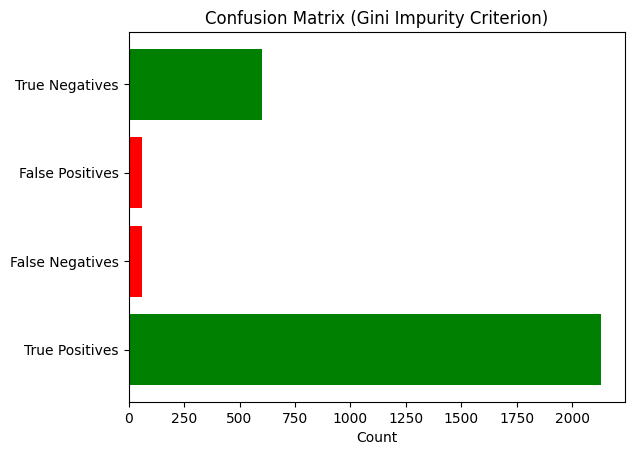

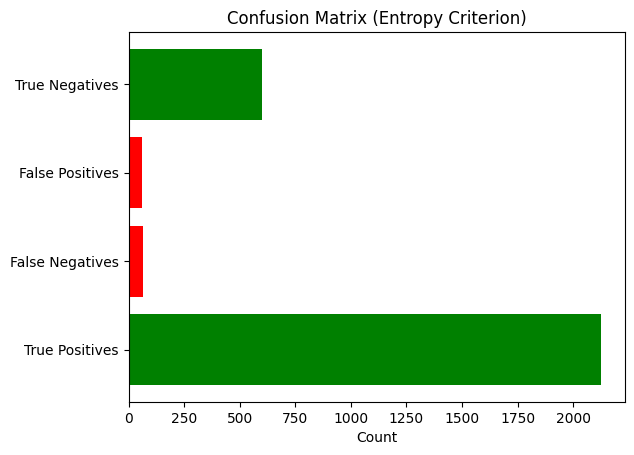

In [53]:
from sklearn.metrics import confusion_matrix

# ... (existing code)

# Function to plot the confusion matrix as a diverging bar chart
def plot_confusion_matrix(y_true, y_pred, criterion_name):
    cm = confusion_matrix(y_true, y_pred)
    categories = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    fig, ax = plt.subplots()

    # Calculate positions for bars on X-axis
    x = np.arange(len(categories))

    ax.barh(x, cm.ravel(), color=['green', 'red', 'red', 'green'])
    ax.set_yticks(x)
    ax.set_yticklabels(categories)
    ax.invert_yaxis()  # Invert y-axis for better visualization
    ax.set_xlabel('Count')
    ax.set_title(f'Confusion Matrix ({criterion_name} Criterion)')

    plt.show()

# Plot confusion matrix for Gini impurity
plot_confusion_matrix(y_test, y_pred_min_leaf_gini, 'Gini Impurity')

# Plot confusion matrix for entropy
plot_confusion_matrix(y_test, y_pred_max_depth_entropy, 'Entropy')

bar chart to visualize the importance of each feature in the pruned decision tree model for both Gini impurity and entropy criteria.

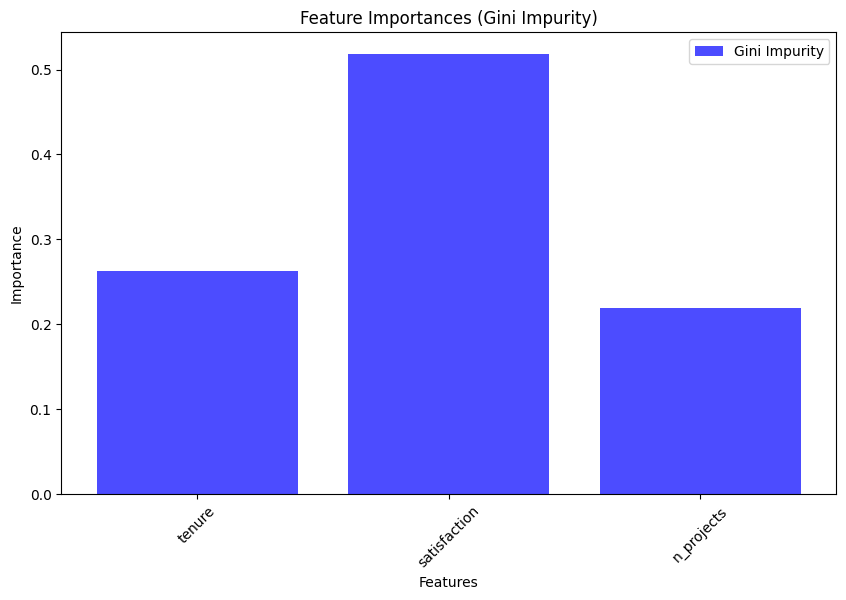

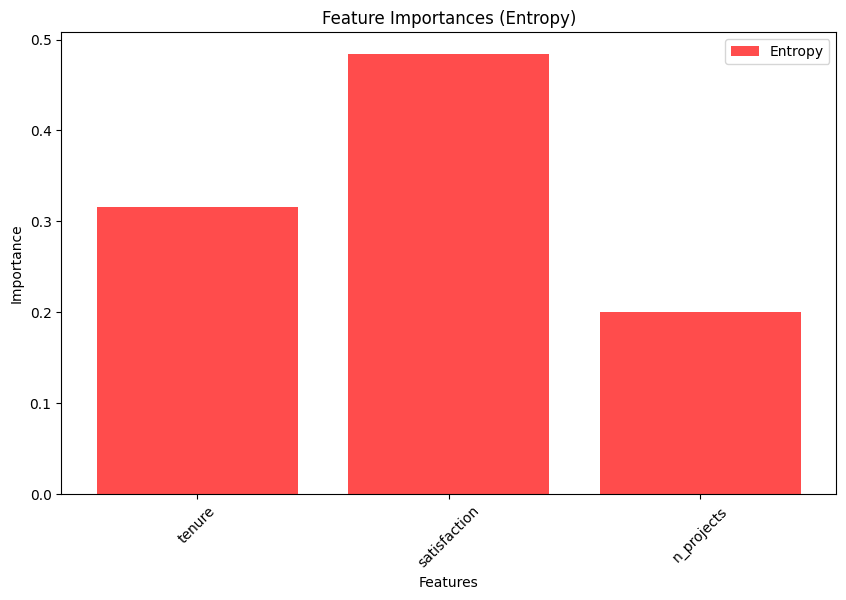

In [54]:
feature_importances_gini = clf_min_leaf_gini.feature_importances_

# Calculate feature importances for entropy
feature_importances_entropy = clf_max_depth_entropy.feature_importances_

# Plot feature importances for Gini impurity
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances_gini, color='b', alpha=0.7, label='Gini Impurity')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Gini Impurity)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot feature importances for entropy
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances_entropy, color='r', alpha=0.7, label='Entropy')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Entropy)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

incorporating both Gini impurity and entropy as criteria for finding the best splits in the decision tree

In [55]:
print("Evaluation of Decision Tree with Gini Impurity:")

best_accuracy_gini = 0
best_min_leaf_gini = None

for min_leaf in min_leaf_sizes:
    clf_min_leaf_gini = DecisionTreeClassifier(criterion="gini", min_samples_leaf=min_leaf)
    clf_min_leaf_gini.fit(X_train, y_train)

    y_pred_min_leaf_gini = clf_min_leaf_gini.predict(X_test)

    acc_min_leaf_gini = accuracy_score(y_test, y_pred_min_leaf_gini)

    if acc_min_leaf_gini > best_accuracy_gini:
        best_accuracy_gini = acc_min_leaf_gini
        best_min_leaf_gini = min_leaf

    print(f"Accuracy for min_samples_leaf={min_leaf}: {acc_min_leaf_gini:.2f}")

print(f"\nBest accuracy with Gini Impurity: {best_accuracy_gini:.2f} (min_samples_leaf={best_min_leaf_gini})")

# Pruning using maximum depth and evaluate metrics for Entropy
print("\nEvaluation of Decision Tree with Entropy:")

best_accuracy_entropy = 0
best_max_depth_entropy = None

for depth in max_depths:
    clf_max_depth_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth_entropy.fit(X_train, y_train)

    y_pred_max_depth_entropy = clf_max_depth_entropy.predict(X_test)

    acc_max_depth_entropy = accuracy_score(y_test, y_pred_max_depth_entropy)

    if acc_max_depth_entropy > best_accuracy_entropy:
        best_accuracy_entropy = acc_max_depth_entropy
        best_max_depth_entropy = depth
        print(f"Accuracy for max_depth={depth}: {acc_max_depth_entropy:.2f}")

print(f"\nBest accuracy with Entropy: {best_accuracy_entropy:.2f} (max_depth={best_max_depth_entropy})")

Evaluation of Decision Tree with Gini Impurity:
Accuracy for min_samples_leaf=1: 0.94
Accuracy for min_samples_leaf=5: 0.95
Accuracy for min_samples_leaf=10: 0.96
Accuracy for min_samples_leaf=20: 0.96

Best accuracy with Gini Impurity: 0.96 (min_samples_leaf=20)

Evaluation of Decision Tree with Entropy:
Accuracy for max_depth=3: 0.91
Accuracy for max_depth=5: 0.95
Accuracy for max_depth=7: 0.96

Best accuracy with Entropy: 0.96 (max_depth=7)
